In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import numpy as np

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df['Time_in_each_comp'] = (df['Age']-20) / ((df)['NumCompaniesWorked']+1)
df['TotalSatisfaction_mean'] = (df['RelationshipSatisfaction']  + df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['JobInvolvement'] + df['WorkLifeBalance'])/5
df['Income_YearsComp'] = df['MonthlyIncome'] / df['YearsAtCompany']
df['Income_YearsComp'] = df['Income_YearsComp'].replace(np.Inf, 0)
df['Income_Distance'] = df['MonthlyIncome'] / df['DistanceFromHome']
df['Fidelity'] = (df['NumCompaniesWorked']) / df['TotalWorkingYears']
df['Fidelity'] = df['Fidelity'].replace(np.Inf, 0)
df['Stability'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['Stability'].fillna((df['Stability'].mean()), inplace=True)
df['Hrate_Mrate'] = df['HourlyRate'] / df['MonthlyRate']
def SalesDpt(df) :
    if df['Department'] == 'Sales':
        return 1
    else:
        return 0
df['SalesDpt'] = df.apply(lambda df:SalesDpt(df) ,axis = 1)

df.columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,Time_in_each_comp,TotalSatisfaction_mean,Income_YearsComp,Income_Distance,Fidelity,Stability,Hrate_Mrate,SalesDpt
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,5,2.333333,2.2,998.833333,5993.000000,1.000000,0.666667,0.004826,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,7,14.500000,2.8,513.000000,641.250000,0.100000,0.700000,0.002449,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,2.428571,2.8,0.000000,1045.000000,0.857143,0.596061,0.038397,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,6.500000,3.2,363.625000,969.666667,0.125000,0.875000,0.002418,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,0.700000,2.6,1734.000000,1734.000000,1.500000,1.000000,0.002405,0


In [3]:
#'Age','Attrition','DistanceFromHome','EnvironmentSatisfaction','Gender','HourlyRate','JobLevel','JobSatisfaction','MaritalStatus',
#'MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
#'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'

# features=['Age','DistanceFromHome','EnvironmentSatisfaction','Gender','HourlyRate','JobLevel','JobSatisfaction','MaritalStatus',
# 'MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
# 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']


# features=['DistanceFromHome','EnvironmentSatisfaction','Gender','HourlyRate','JobLevel','JobSatisfaction','MaritalStatus',
# 'MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
# 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']



features=['TrainingTimesLastYear',
'PerformanceRating',
'Age',
'DistanceFromHome',
'StockOptionLevel',
'JobSatisfaction',
'MaritalStatus']

features=['OverTime', 'Fidelity', 'Stability', 'Hrate_Mrate', 'SalesDpt', 'MaritalStatus', 'Gender']

In [4]:
#select features
data=df[features]
data_binary_encoded = pd.get_dummies(data)
X=data_binary_encoded
y=pd.get_dummies(df['Attrition'])

In [5]:
#Splitting and scaling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [6]:
#Train the model
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
print(f"Training score: {model.score(X_train_scaled,y_train)}")
print(f"Test score: {model.score(X_test_scaled,y_test)}")

Training score: 1.0
Test score: 0.7907608695652174


In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, verbose=3)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 2/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 3/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 4/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 5/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 1/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 2/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 3/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 4/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 5/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 1/5] END ....................criterion=gini, max_depth=6; total time=   0.0s
[CV 2/5] END ....................criterion=gini

[CV 1/5] END .................criterion=entropy, max_depth=9; total time=   0.0s
[CV 2/5] END .................criterion=entropy, max_depth=9; total time=   0.0s
[CV 3/5] END .................criterion=entropy, max_depth=9; total time=   0.0s
[CV 4/5] END .................criterion=entropy, max_depth=9; total time=   0.0s
[CV 5/5] END .................criterion=entropy, max_depth=9; total time=   0.0s
[CV 1/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 2/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 3/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 4/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 5/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 1/5] END ................criterion=entropy, max_depth=11; total time=   0.0s
[CV 2/5] END ................criterion=entropy, max_depth=11; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             verbose=3)

In [8]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 4}
0.860246812011518


In [9]:
model2=grid.best_estimator_

In [10]:
text_representation = tree.export_text(model2)
print(text_representation)



|--- feature_5 <= 0.50
|   |--- feature_0 <= 0.16
|   |   |--- feature_1 <= 0.60
|   |   |   |--- feature_0 <= 0.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.12
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.60
|   |   |   |--- feature_2 <= 0.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.12
|   |   |   |   |--- class: 1
|   |--- feature_0 >  0.16
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_1 <= 0.17
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.17
|   |   |   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- feature_0 <= 0.19
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_2 <= 0.02
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.02
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_3 <= 0.50


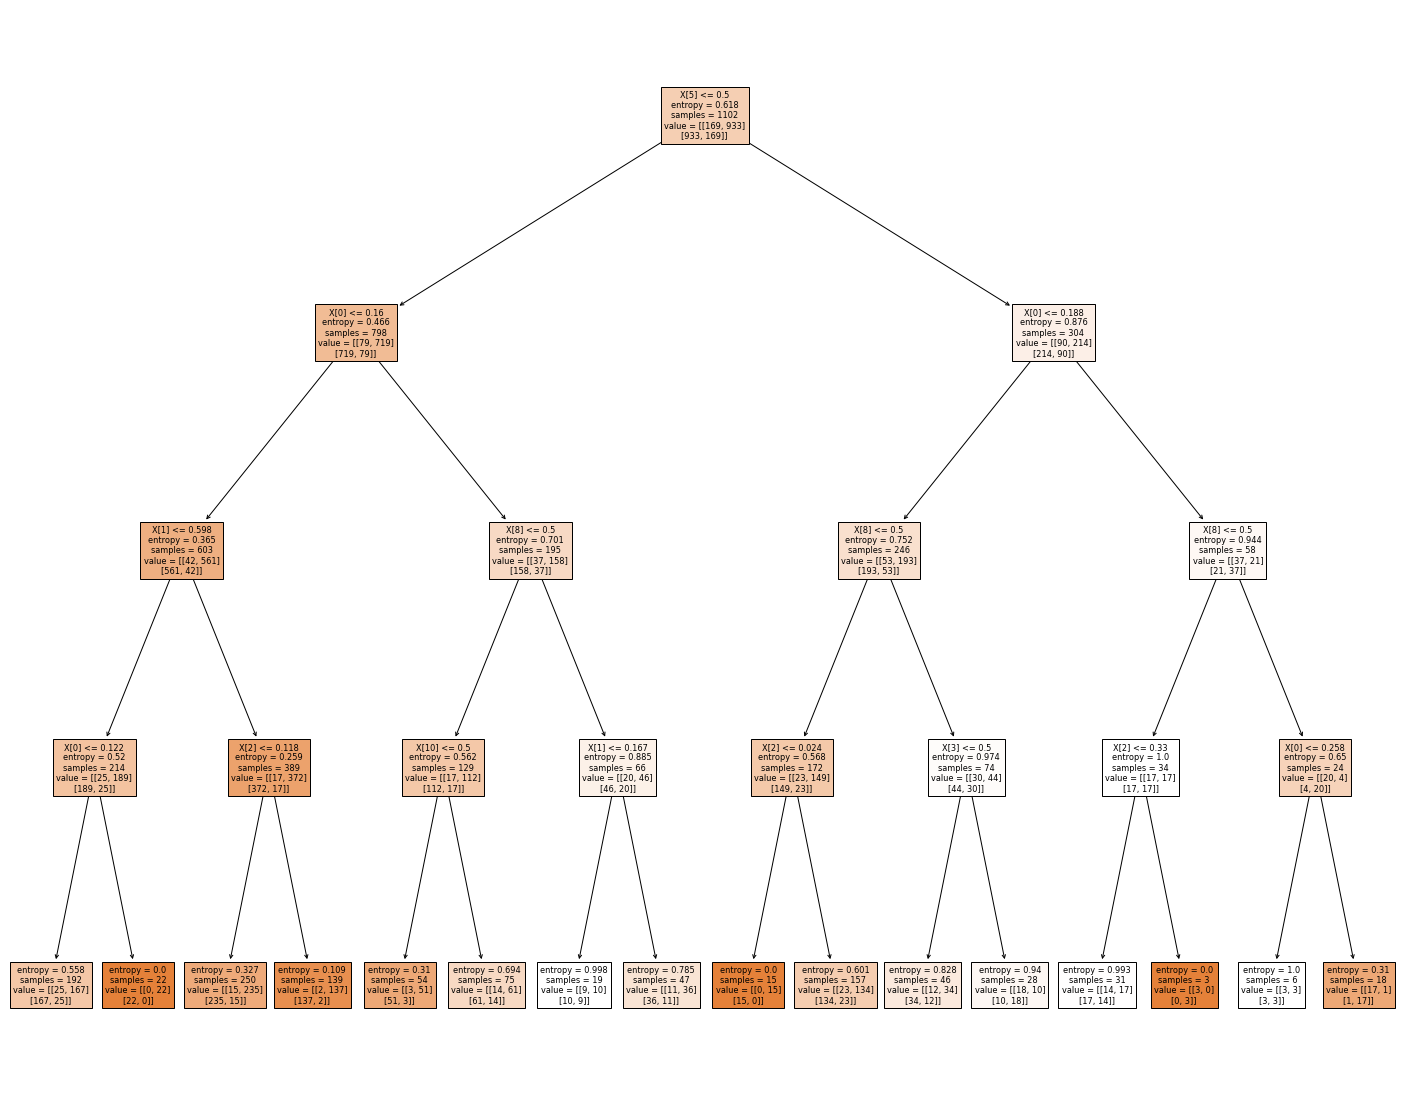

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2, 
                   feature_names=None,
                   filled=True)


In [12]:
test=model2.predict(X)

print(classification_report(y,test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1233
           1       0.58      0.20      0.30       237

   micro avg       0.85      0.84      0.85      1470
   macro avg       0.72      0.59      0.61      1470
weighted avg       0.82      0.84      0.82      1470
 samples avg       0.84      0.84      0.84      1470



C:\Users\sdelc\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
